In [1]:
from __future__ import division
from __future__ import print_function
import scipy
from scipy.special import jv
from scipy.fftpack import *
import numpy as np
import matplotlib.pyplot as plt
import ehtim as eh
from ehtim.calibrating import self_cal as sc
import ehtim.observing.pulses as pl
from ehtim.const_def import *
import matplotlib.pyplot as plt
import numpy as np
import ehtim as eh
from   ehtim.calibrating import self_cal as sc
import time
#from  ehtim.plotting import self_cal as sc
plt.close('all')

ttype = 'direct'

Welcome to eht-imaging! v 1.2.6 



In [2]:
# Load the image and the array
#im = eh.image.load_txt('/home/alex/Videos/eht-imaging-dev/models/roman_eofn.txt')
eht = eh.array.load_txt('/home/alex/Videos/eht-imaging-dev/arrays/EHT2017.txt')

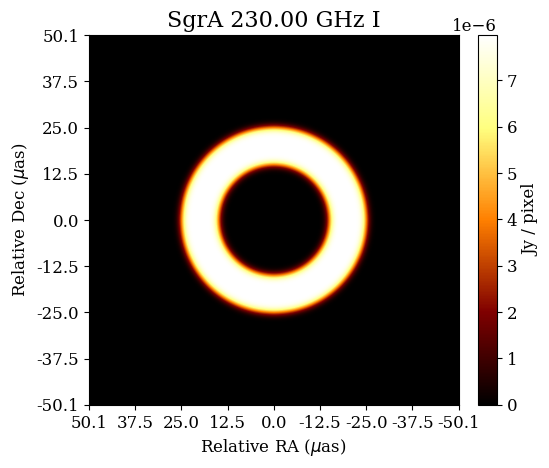

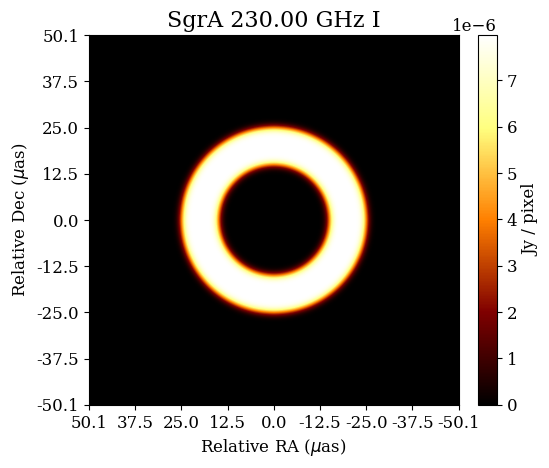

In [4]:
x = np.linspace(-50,50,1000)
muas2rad = 1e-6/3600*np.pi/180
x *= muas2rad
X,Y = np.meshgrid(x,x)
R = np.sqrt(X**2+Y**2)
psize = np.diff(x)[0]
umax = 1./psize/2.
umin = 1./(np.amax(x)-np.amin(x))
image = np.zeros(np.shape(X))
image += 1.*((R<=25.*muas2rad) & (R>=15.*muas2rad))

image /= np.sum(image)

from scipy.ndimage import gaussian_filter

# Your code for creating the 'image' variable (from the previous code snippet)

# Define the standard deviation of the Gaussian kernel for blurring
sigma = 10.0  # Adjust this value as needed for the desired blur effect

# Apply Gaussian blur to the image
image = gaussian_filter(image, sigma=sigma)
# this creates an eh.image object which ehtim can work with
im = eh.image.Image(image[:,:],psize,RA_DEFAULT,DEC_DEFAULT,RF_DEFAULT, mjd=MJD_DEFAULT,pulse=pl.deltaPulse2D)

zbl = im.total_flux()

# this is the lines that don't work for me
im.display()


#image = np.zeros(np.shape(X)) # start with empty image
#image += Gaussian(R-20*muas2rad,11*muas2rad) # add circle
#image += Gaussian2d(X,Y,4.*muas2rad,20.*muas2rad,0.*muas2rad) # add 2D Gaussian
#im = eh.image.Image(image[:,:],psize,RA_DEFAULT,DEC_DEFAULT,RF_DEFAULT, mjd=MJD_DEFAULT,pulse=pl.deltaPulse2D)
#im.display()


In [5]:
tint_sec = 5
tadv_sec = 600
tstart_hr = 0
tstop_hr = 24
bw_hz = 4e9
obs = im.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                 sgrscat=False, ampcal=True, phasecal=False)


Generating empty observation file . . . 
Producing clean visibilities from image with nfft FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
   Applying atmospheric phase corruption: phasecal-->False
Adding thermal noise to data . . . 


Clean beam parameters:  [1.19728384e-10 7.88252023e-11 1.38129500e+00]
Nominal Resolution:  1.1454591407637095e-10
Generating I image...
Initial S_1: 0.000000 S_2: 0.000000 S_3: 0.000000
Initial Chi^2_1: 273.744867 Chi^2_2: 1.000000 Chi^2_3: 1.000000
Initial Objective Function: 27274.486745
Total Data 1:  645
Total Pixel #:  16384
Clipped Pixel #:  16384

i: 0 chi2_1: 273.74 chi2_2: 1.00 chi2_3: 1.00 s_1: -0.00 s_2: 0.00 s_3: 0.00


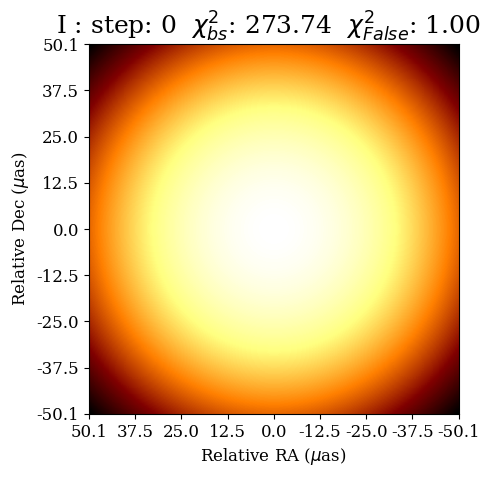

i: 1 chi2_1: 272.93 chi2_2: 1.00 chi2_3: 1.00 s_1: -0.00 s_2: 0.00 s_3: 0.00


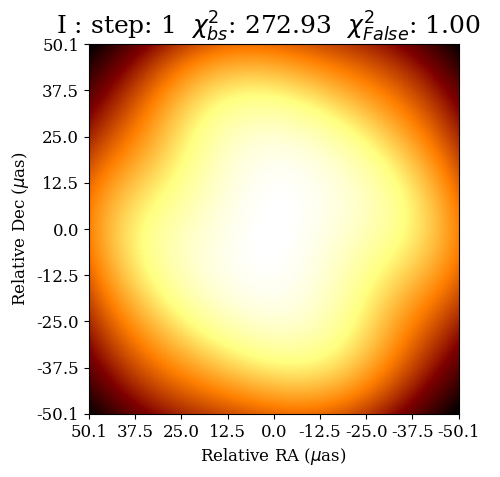

i: 2 chi2_1: 264.03 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.01 s_2: 0.00 s_3: 0.00


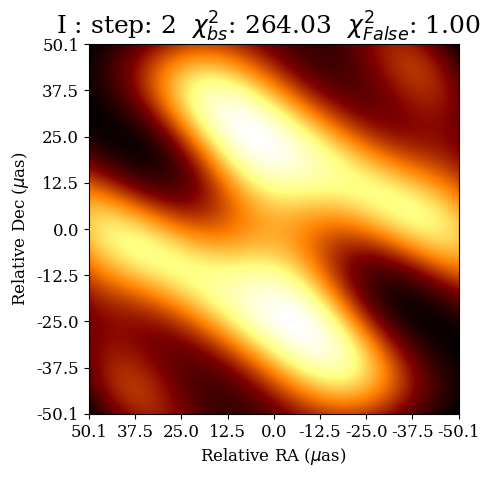

i: 3 chi2_1: 263.20 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.01 s_2: 0.00 s_3: 0.00


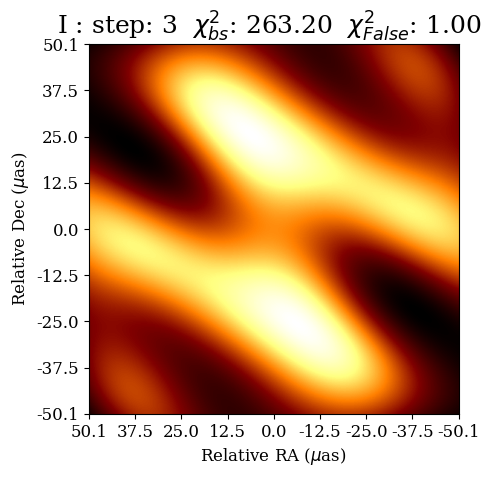

i: 4 chi2_1: 248.81 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.05 s_2: 0.00 s_3: 0.00


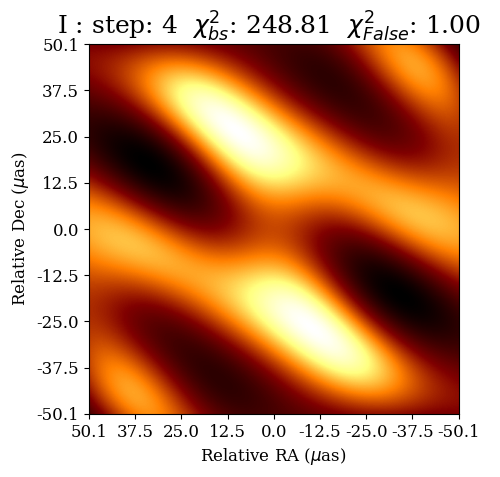

i: 5 chi2_1: 244.45 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.08 s_2: 0.00 s_3: 0.00


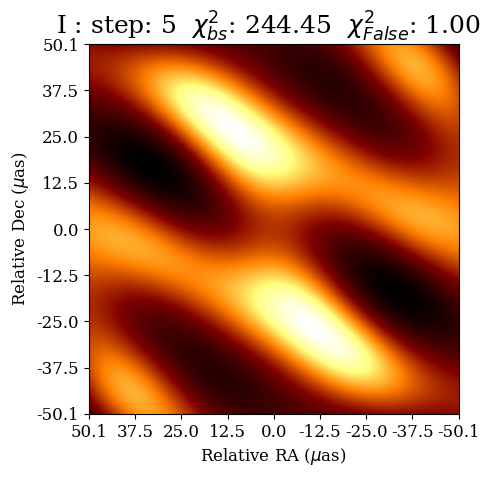

i: 6 chi2_1: 236.29 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.10 s_2: 0.00 s_3: 0.00


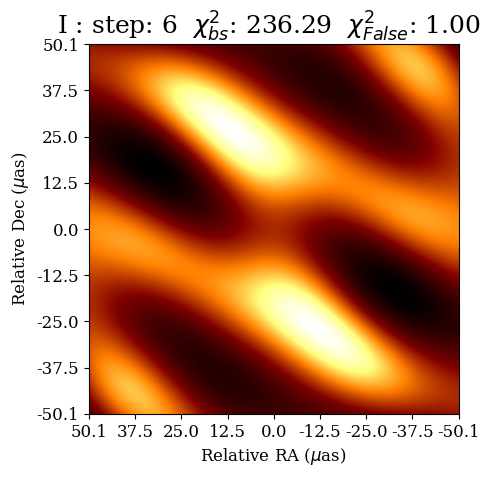

i: 7 chi2_1: 222.10 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.11 s_2: 0.00 s_3: 0.00


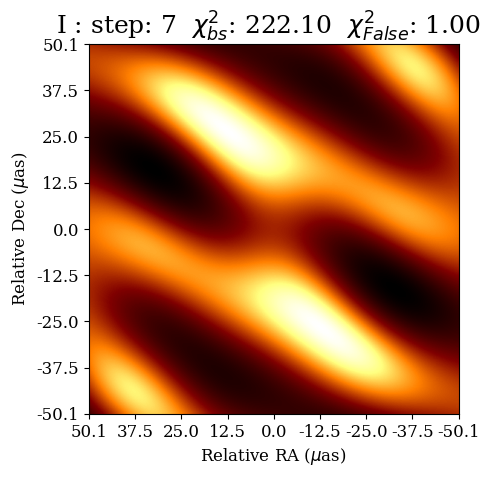

i: 8 chi2_1: 214.47 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.14 s_2: 0.00 s_3: 0.00


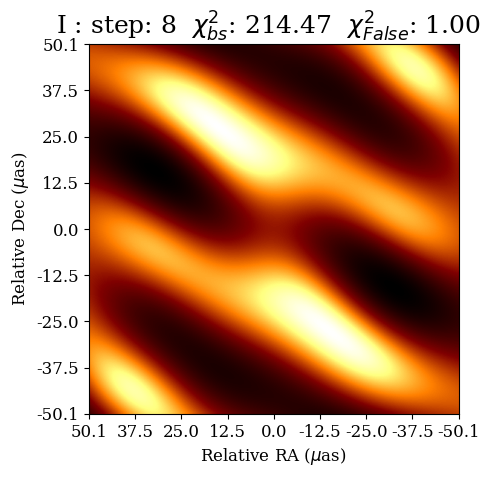

i: 9 chi2_1: 201.96 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.20 s_2: 0.00 s_3: 0.00


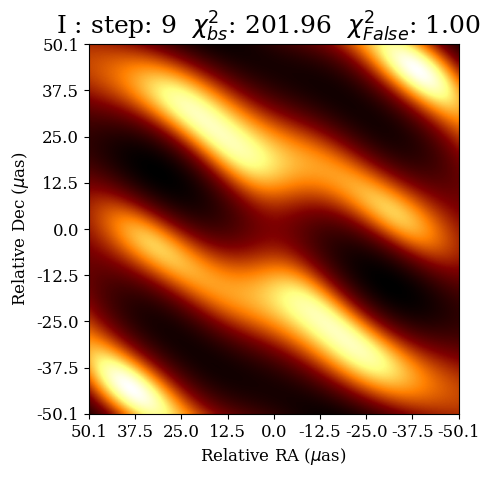

i: 10 chi2_1: 197.08 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.24 s_2: 0.00 s_3: 0.00


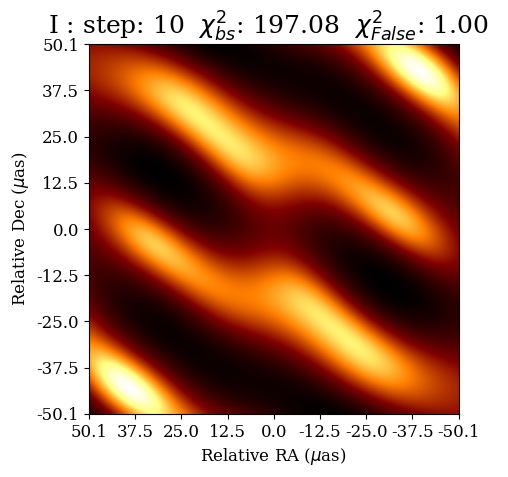

i: 11 chi2_1: 181.55 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.29 s_2: 0.00 s_3: 0.00


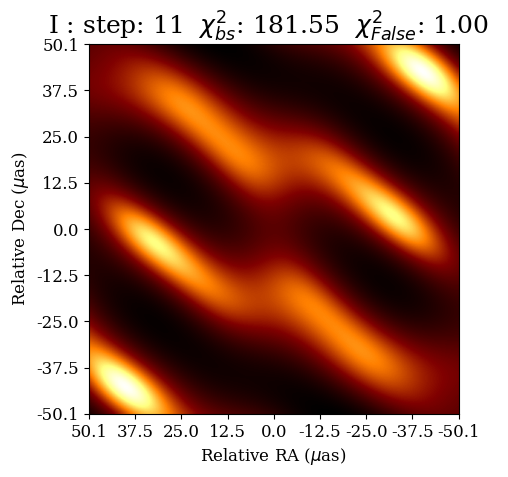

i: 12 chi2_1: 175.85 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.38 s_2: 0.00 s_3: 0.00


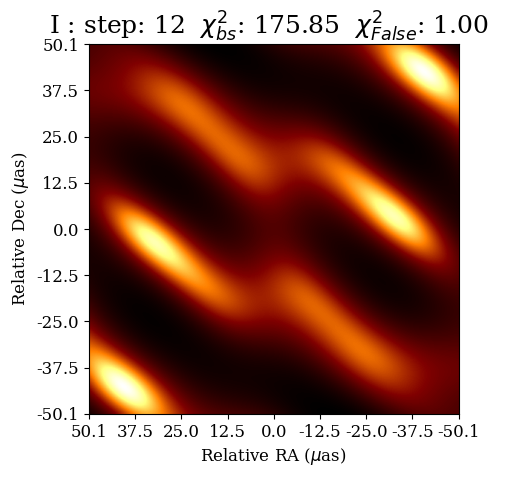

i: 13 chi2_1: 171.74 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.36 s_2: 0.00 s_3: 0.00


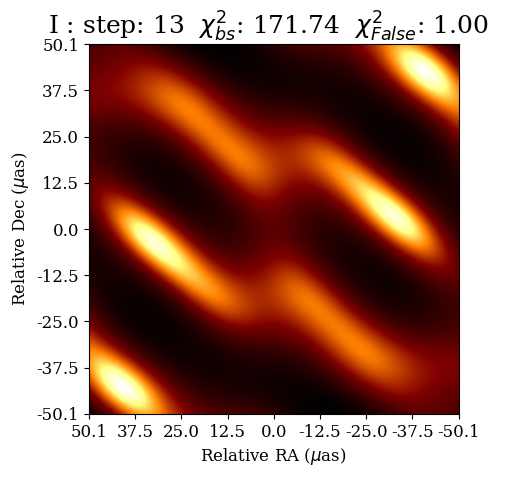

i: 14 chi2_1: 166.60 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.36 s_2: 0.00 s_3: 0.00


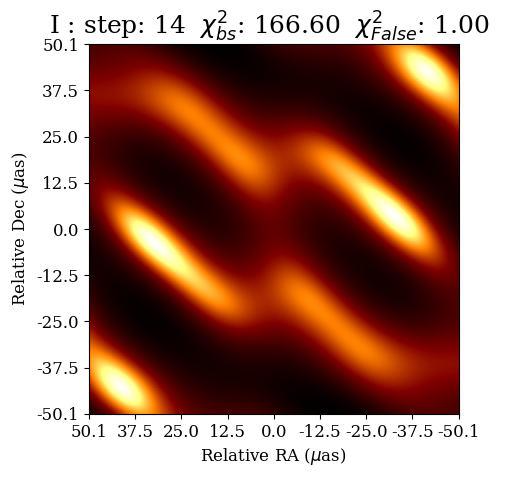

i: 15 chi2_1: 158.75 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.39 s_2: 0.00 s_3: 0.00


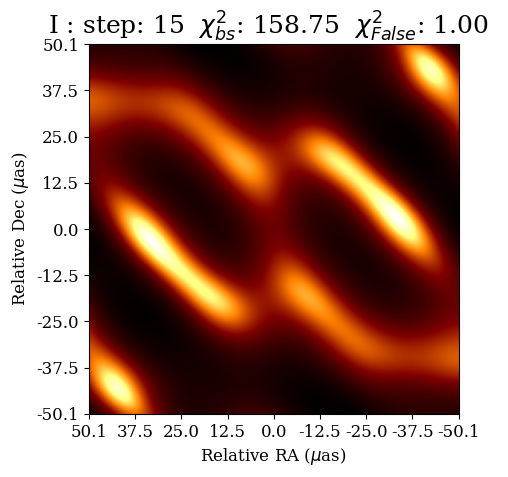

i: 16 chi2_1: 149.74 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.36 s_2: 0.00 s_3: 0.00


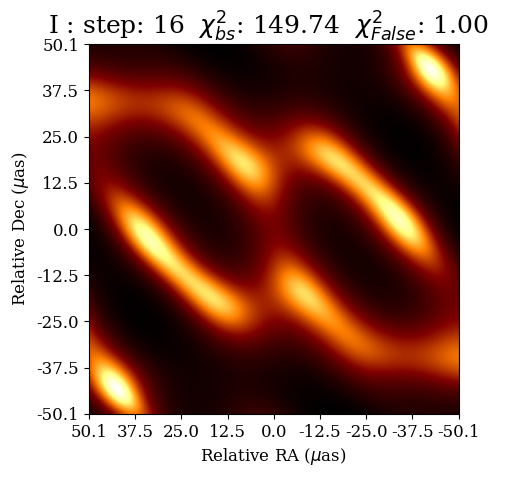

i: 17 chi2_1: 142.65 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.44 s_2: 0.00 s_3: 0.00


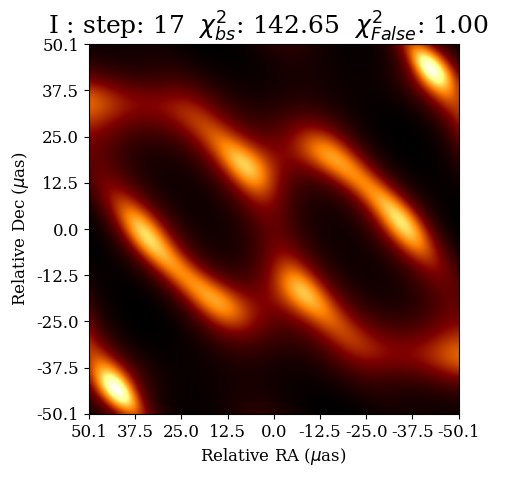

i: 18 chi2_1: 139.07 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.49 s_2: 0.00 s_3: 0.00


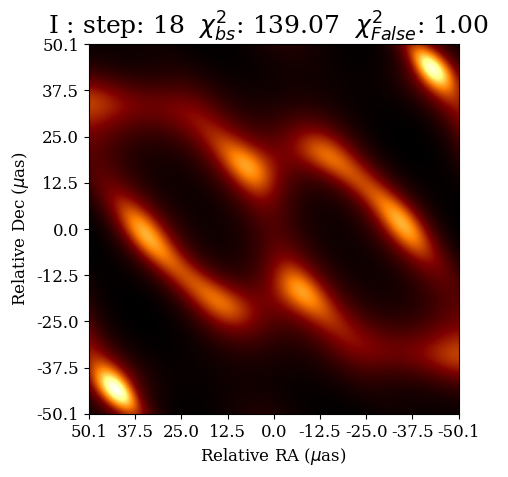

i: 19 chi2_1: 133.67 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.55 s_2: 0.00 s_3: 0.00


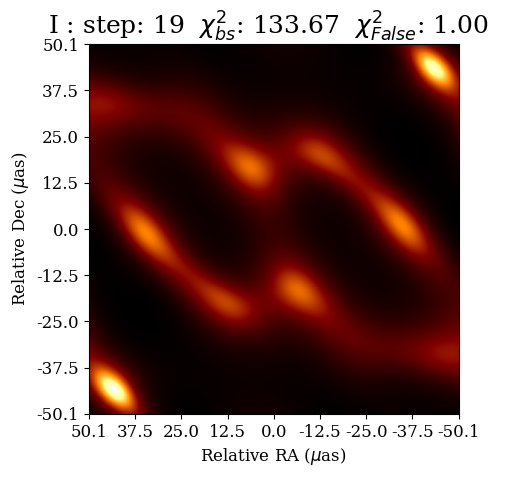

i: 20 chi2_1: 127.05 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.60 s_2: 0.00 s_3: 0.00


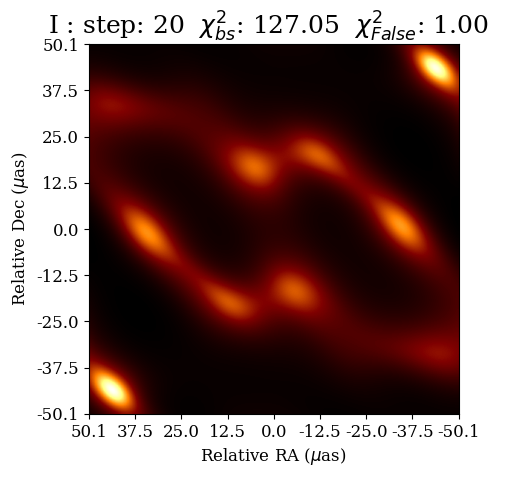

i: 21 chi2_1: 123.78 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.63 s_2: 0.00 s_3: 0.00


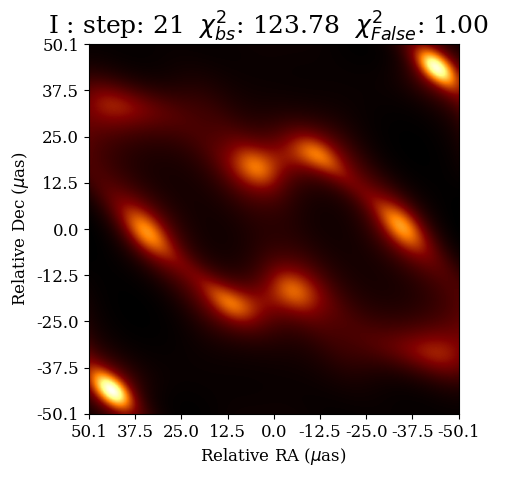

i: 22 chi2_1: 120.58 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.67 s_2: 0.00 s_3: 0.00


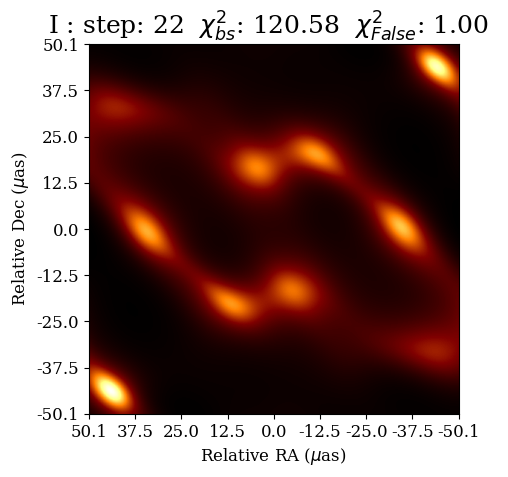

i: 23 chi2_1: 117.42 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.75 s_2: 0.00 s_3: 0.00


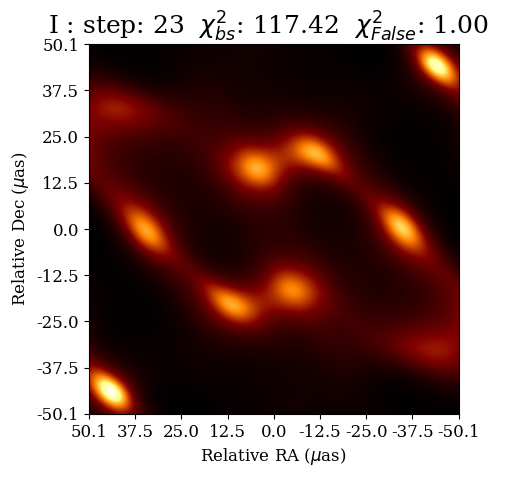

i: 24 chi2_1: 114.32 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.74 s_2: 0.00 s_3: 0.00


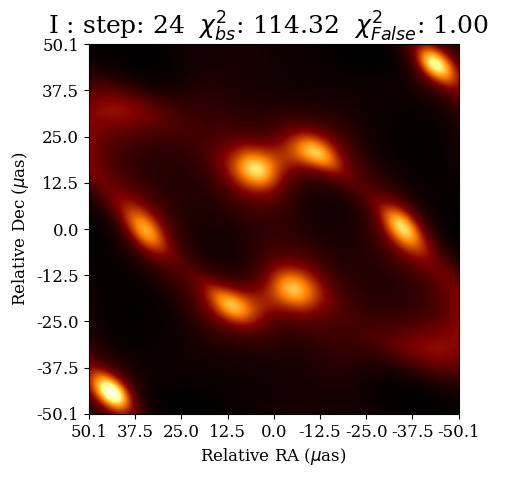

i: 25 chi2_1: 112.98 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.79 s_2: 0.00 s_3: 0.00


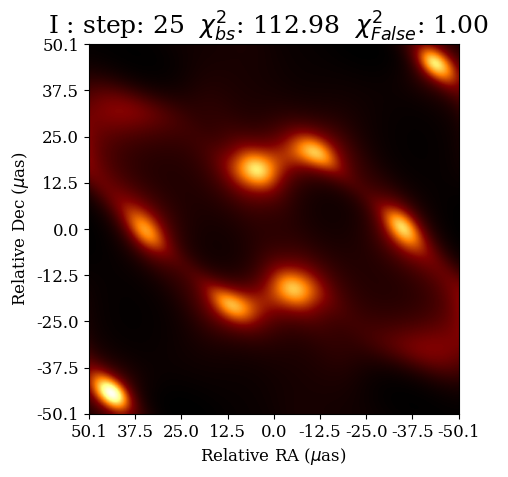

i: 26 chi2_1: 110.03 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.86 s_2: 0.00 s_3: 0.00


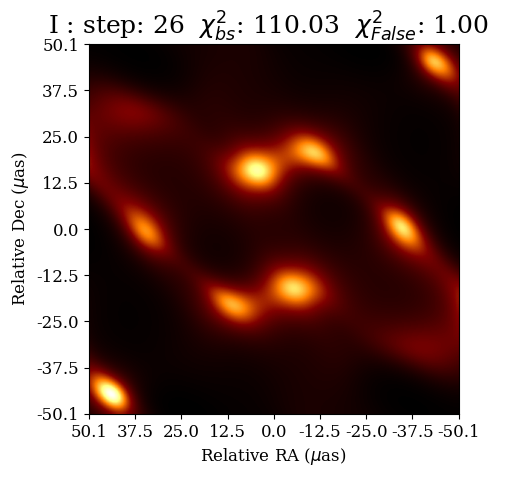

i: 27 chi2_1: 105.33 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.93 s_2: 0.00 s_3: 0.00


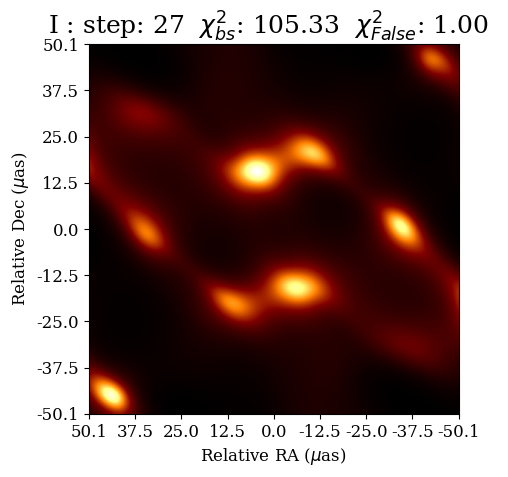

i: 28 chi2_1: 99.84 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.87 s_2: 0.00 s_3: 0.00


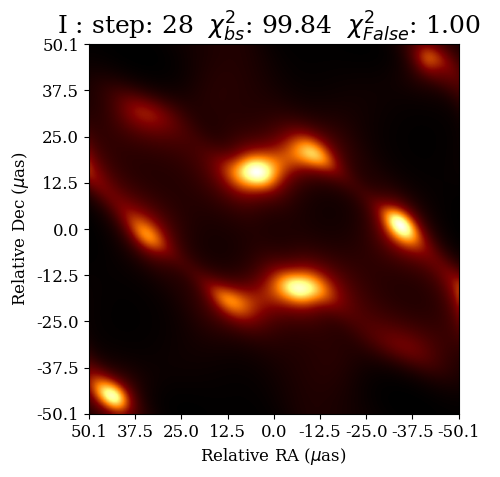

i: 29 chi2_1: 94.96 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.94 s_2: 0.00 s_3: 0.00


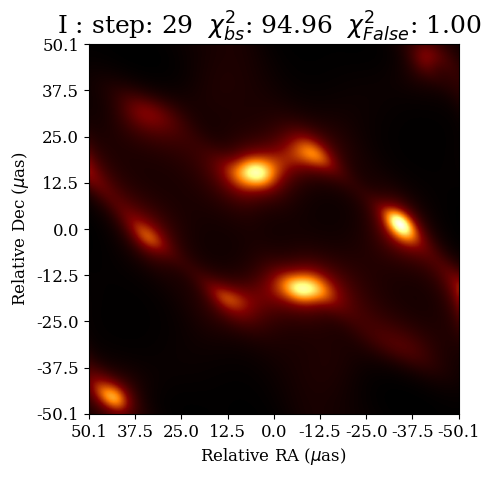

i: 30 chi2_1: 90.62 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.99 s_2: 0.00 s_3: 0.00


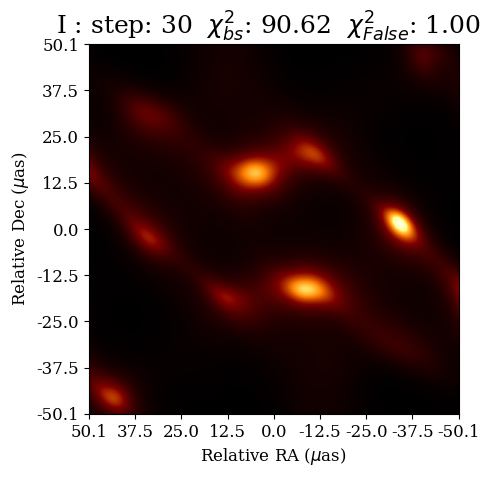

i: 31 chi2_1: 86.21 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.00 s_2: 0.00 s_3: 0.00


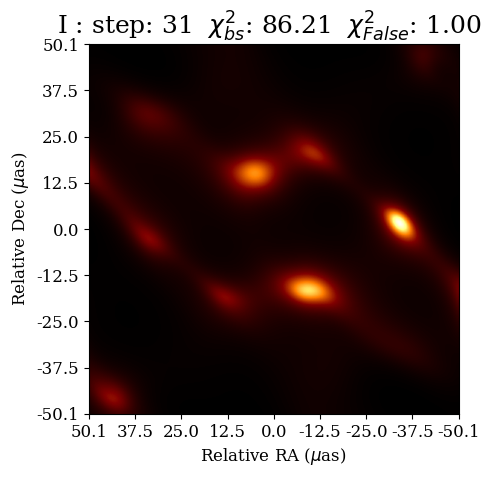

i: 32 chi2_1: 80.93 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.98 s_2: 0.00 s_3: 0.00


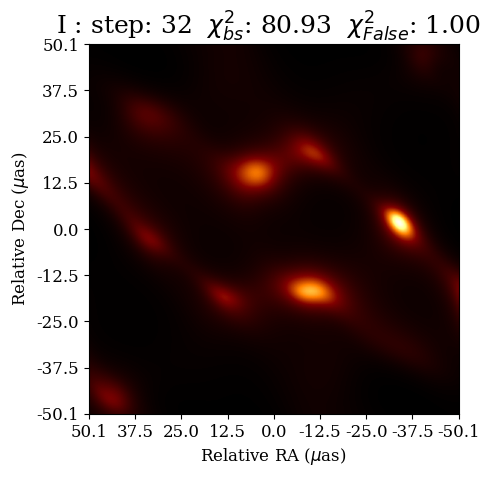

i: 33 chi2_1: 73.21 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.12 s_2: 0.00 s_3: 0.00


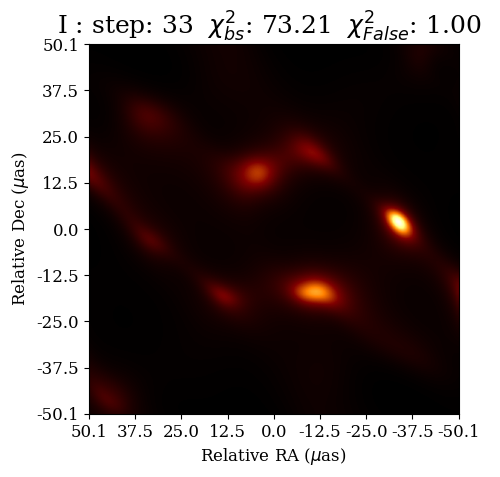

i: 34 chi2_1: 68.72 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.18 s_2: 0.00 s_3: 0.00


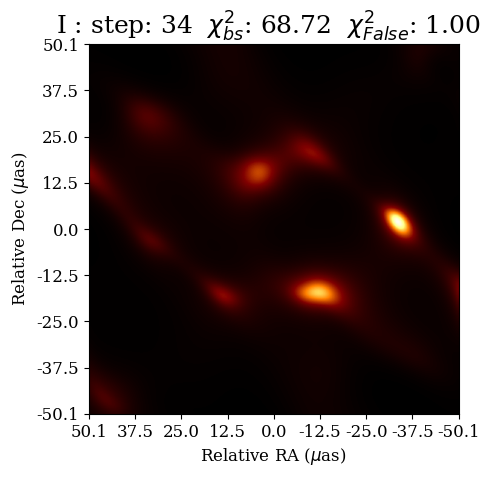

i: 35 chi2_1: 59.63 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.19 s_2: 0.00 s_3: 0.00


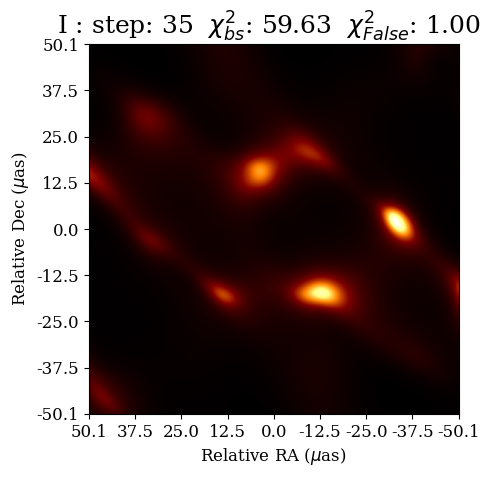

i: 36 chi2_1: 51.02 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.28 s_2: 0.00 s_3: 0.00


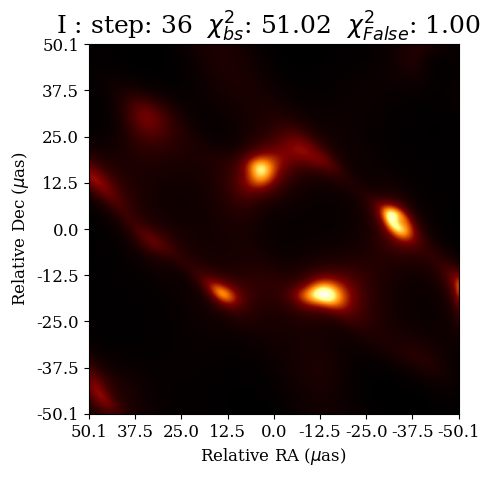

i: 37 chi2_1: 46.44 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.17 s_2: 0.00 s_3: 0.00


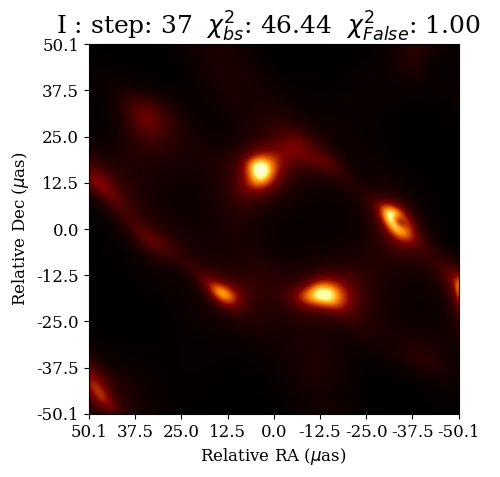

i: 38 chi2_1: 42.26 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.16 s_2: 0.00 s_3: 0.00


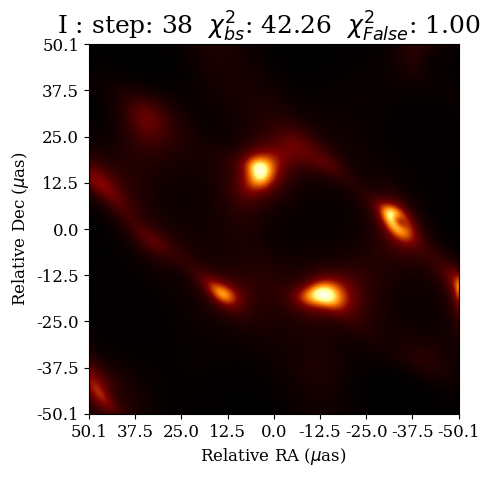

i: 39 chi2_1: 41.34 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.21 s_2: 0.00 s_3: 0.00


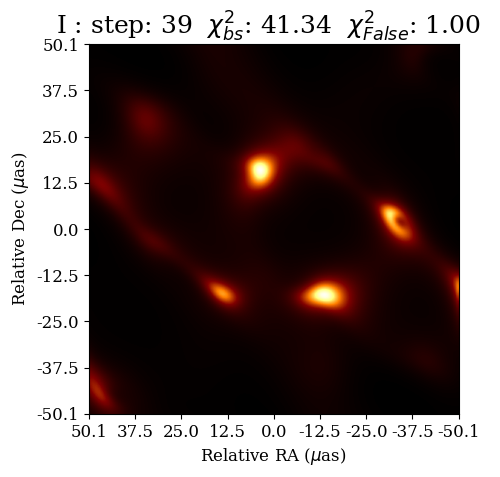

i: 40 chi2_1: 40.61 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.18 s_2: 0.00 s_3: 0.00


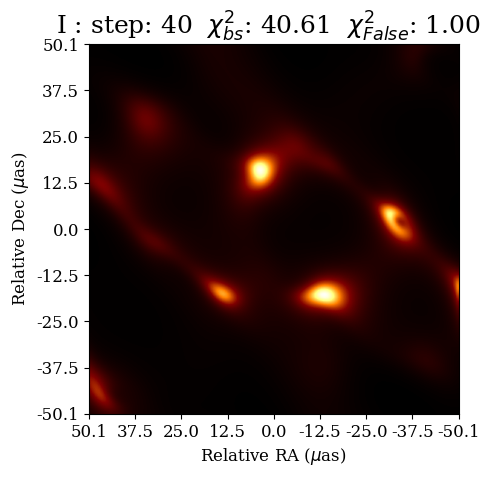

i: 41 chi2_1: 39.45 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.18 s_2: 0.00 s_3: 0.00


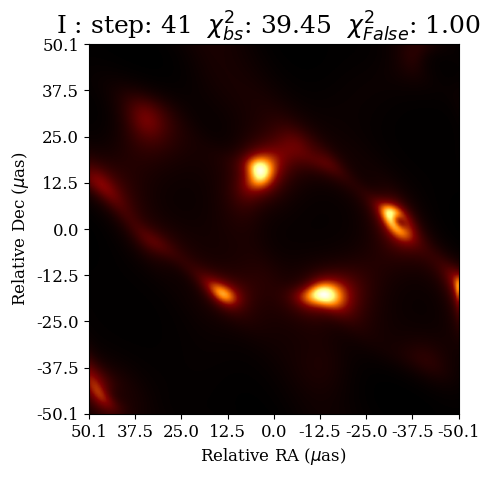

i: 42 chi2_1: 36.10 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.20 s_2: 0.00 s_3: 0.00


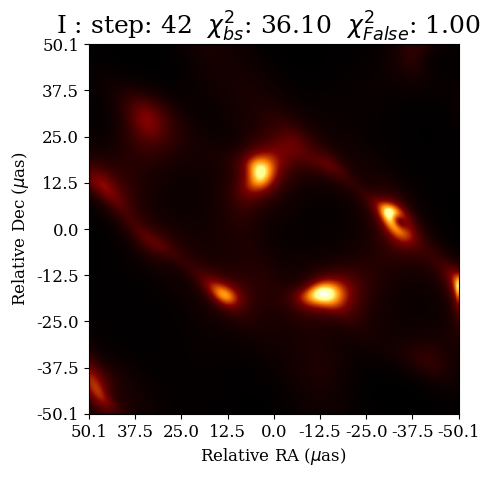

i: 43 chi2_1: 33.78 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.26 s_2: 0.00 s_3: 0.00


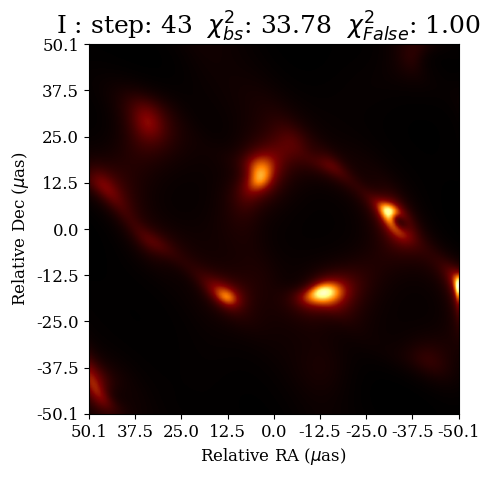

i: 44 chi2_1: 29.53 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.26 s_2: 0.00 s_3: 0.00


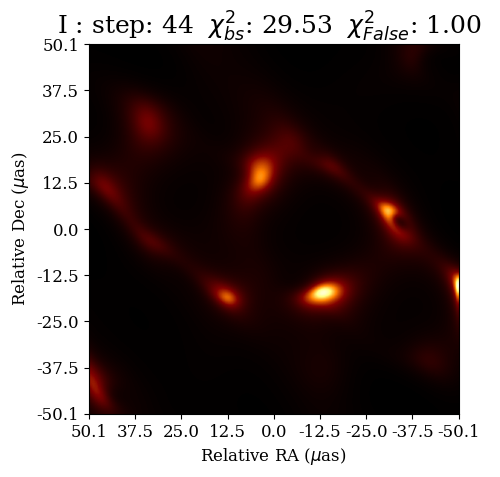

i: 45 chi2_1: 27.37 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.32 s_2: 0.00 s_3: 0.00


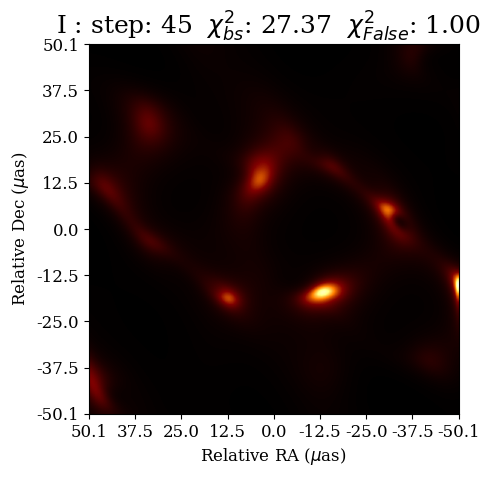

i: 46 chi2_1: 26.50 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.30 s_2: 0.00 s_3: 0.00


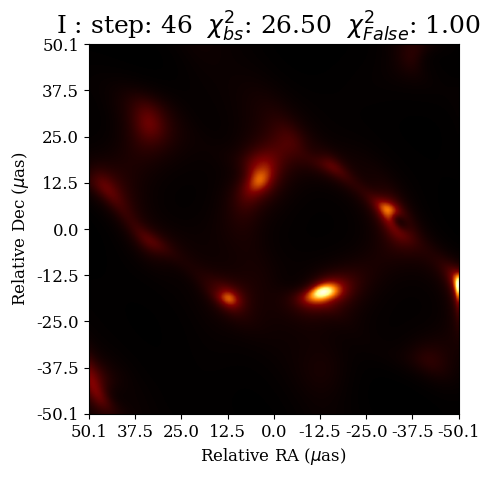

i: 47 chi2_1: 25.08 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.33 s_2: 0.00 s_3: 0.00


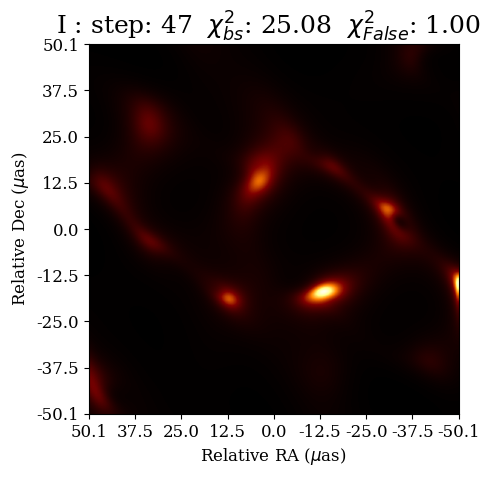

i: 48 chi2_1: 24.25 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.34 s_2: 0.00 s_3: 0.00


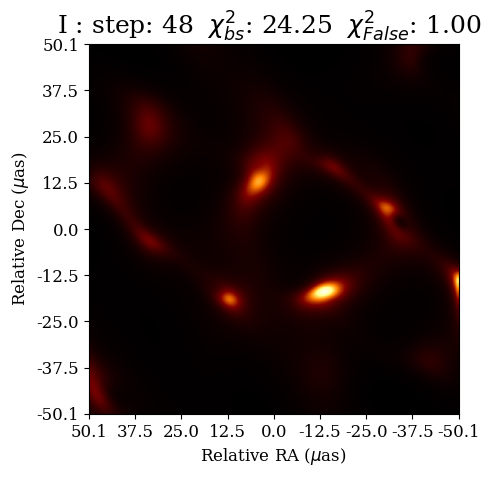

i: 49 chi2_1: 23.49 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.32 s_2: 0.00 s_3: 0.00


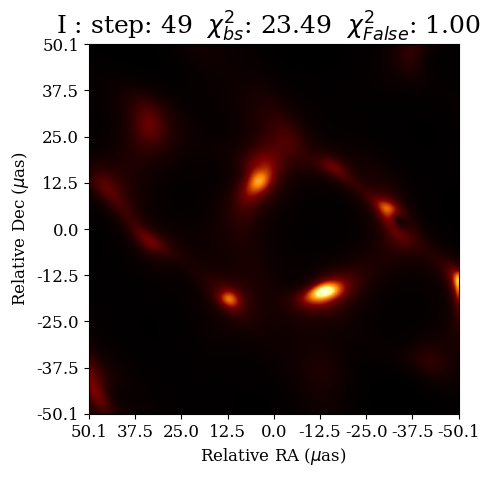

i: 50 chi2_1: 22.77 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.34 s_2: 0.00 s_3: 0.00


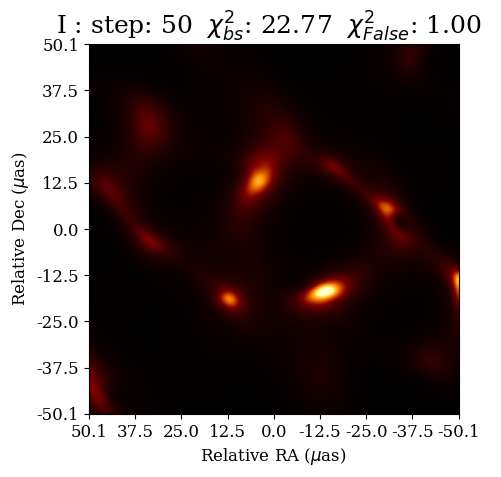

i: 51 chi2_1: 21.60 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.37 s_2: 0.00 s_3: 0.00


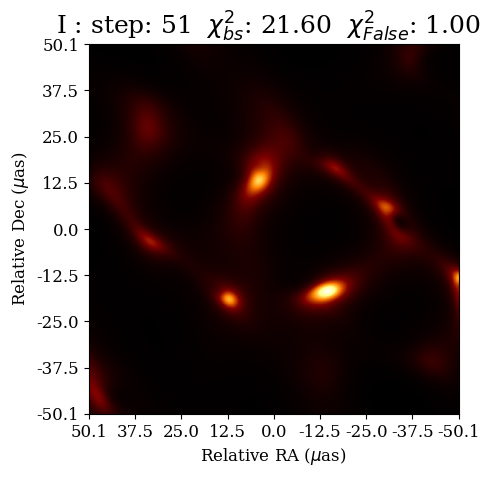

i: 52 chi2_1: 21.35 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.37 s_2: 0.00 s_3: 0.00


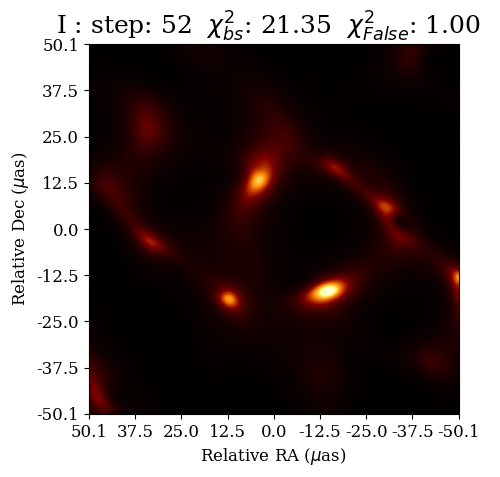

i: 53 chi2_1: 21.14 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.37 s_2: 0.00 s_3: 0.00


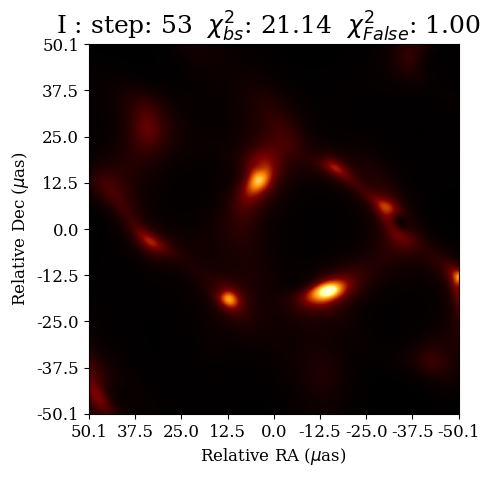

i: 54 chi2_1: 20.96 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.37 s_2: 0.00 s_3: 0.00


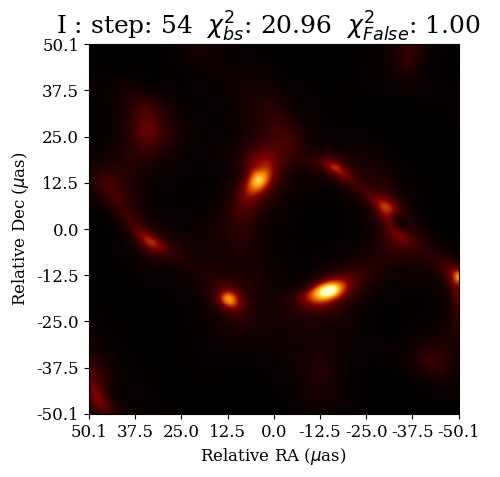

i: 55 chi2_1: 20.72 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.37 s_2: 0.00 s_3: 0.00


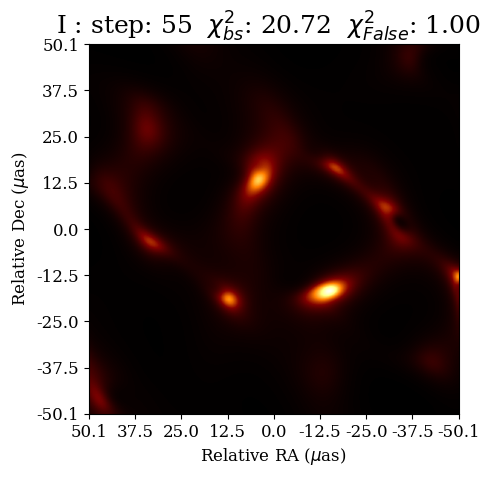

i: 56 chi2_1: 20.42 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.38 s_2: 0.00 s_3: 0.00


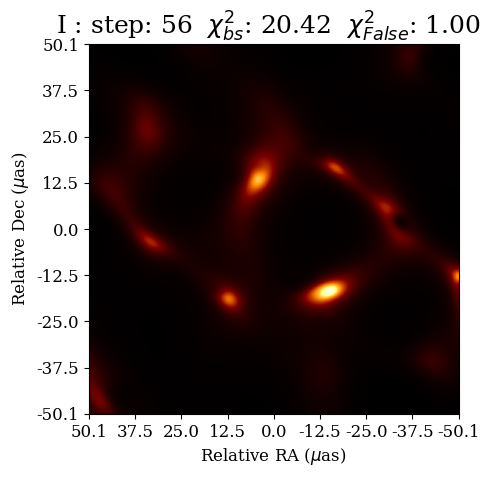

i: 57 chi2_1: 19.93 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.39 s_2: 0.00 s_3: 0.00


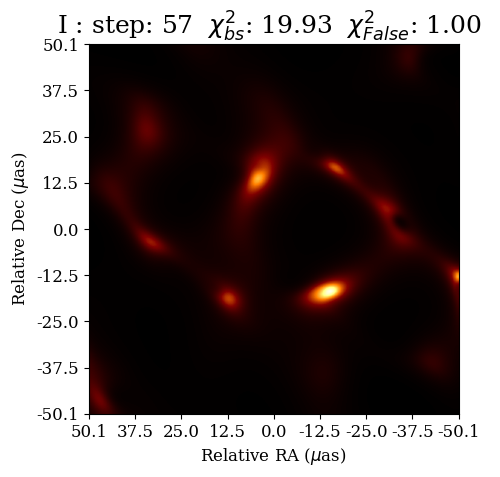

i: 58 chi2_1: 19.34 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.42 s_2: 0.00 s_3: 0.00


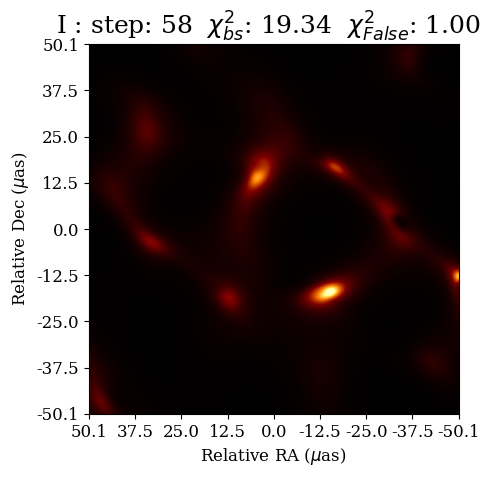

i: 59 chi2_1: 19.04 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.42 s_2: 0.00 s_3: 0.00


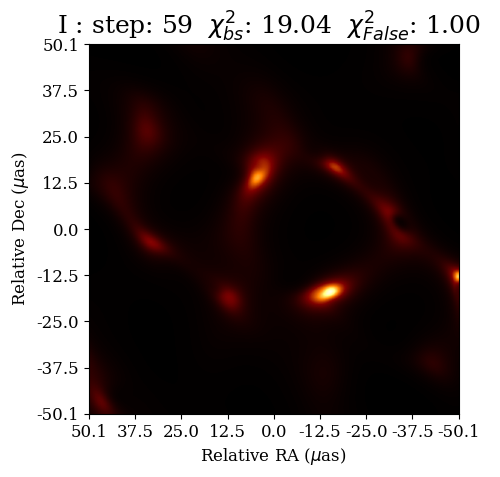

i: 60 chi2_1: 18.60 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.43 s_2: 0.00 s_3: 0.00


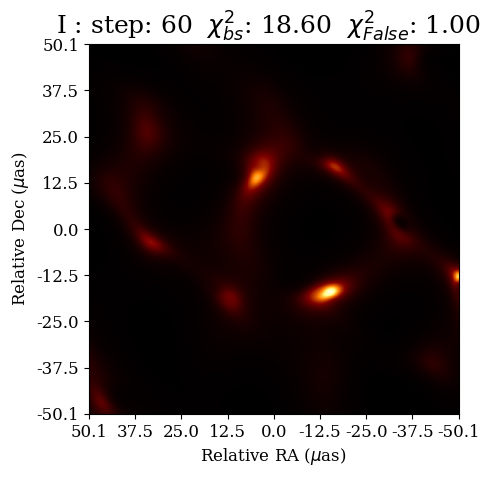

i: 61 chi2_1: 18.37 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.44 s_2: 0.00 s_3: 0.00


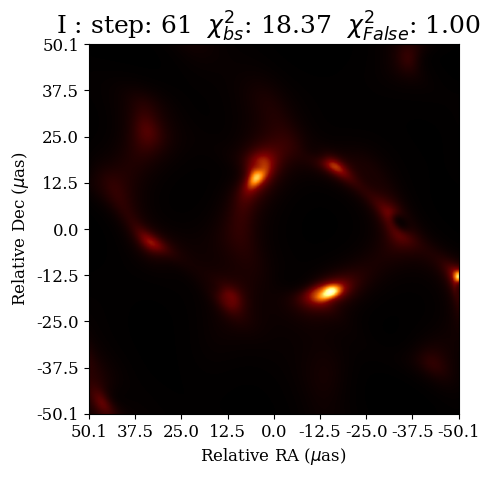

i: 62 chi2_1: 18.07 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.46 s_2: 0.00 s_3: 0.00


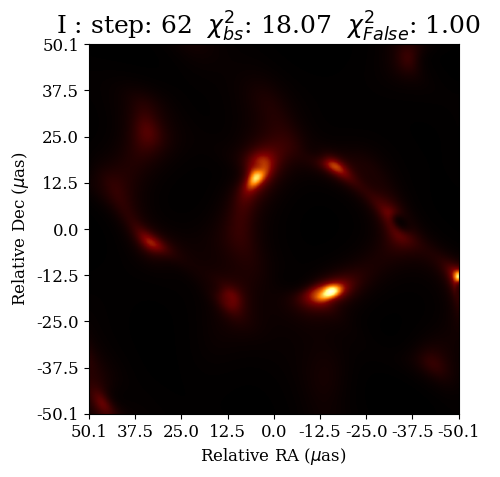

i: 63 chi2_1: 17.64 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.48 s_2: 0.00 s_3: 0.00


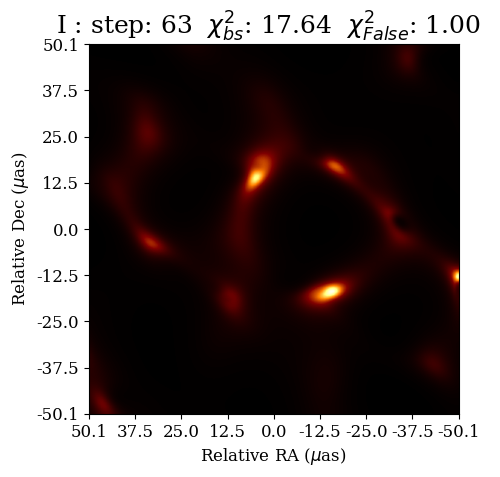

i: 64 chi2_1: 17.46 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.52 s_2: 0.00 s_3: 0.00


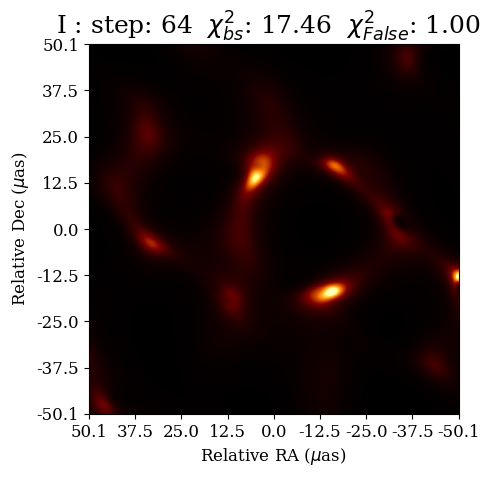

i: 65 chi2_1: 17.17 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.52 s_2: 0.00 s_3: 0.00


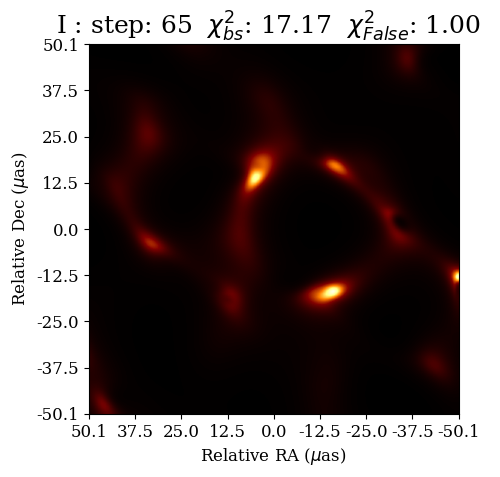

i: 66 chi2_1: 16.99 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.51 s_2: 0.00 s_3: 0.00


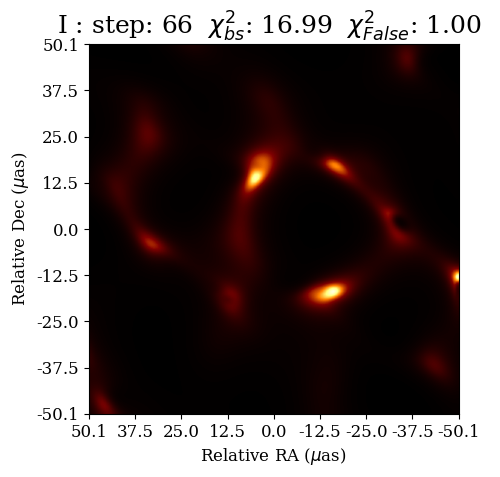

i: 67 chi2_1: 16.82 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.51 s_2: 0.00 s_3: 0.00


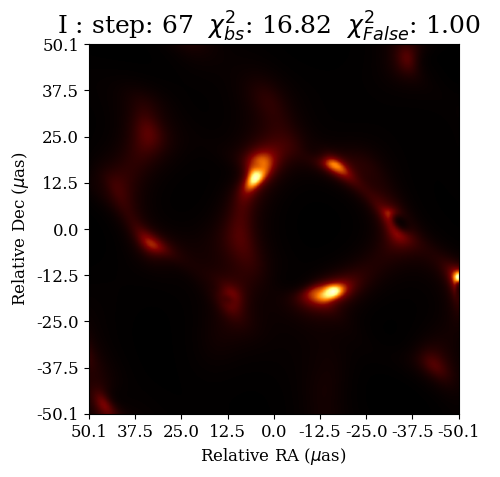

i: 68 chi2_1: 16.54 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.52 s_2: 0.00 s_3: 0.00


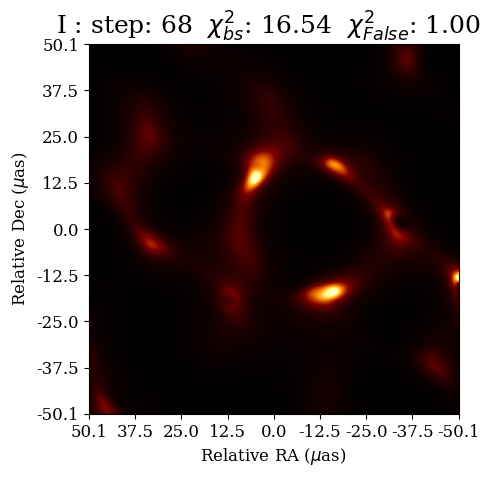

i: 69 chi2_1: 16.22 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.52 s_2: 0.00 s_3: 0.00


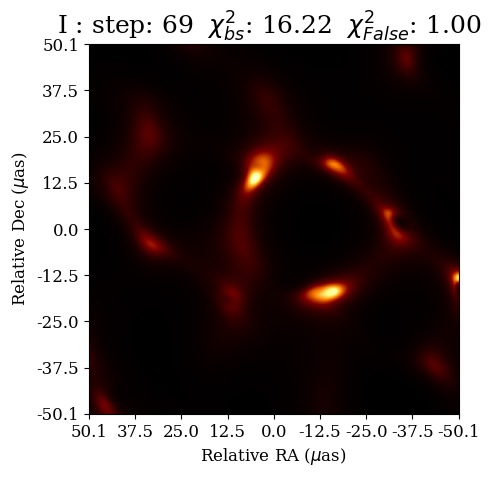

i: 70 chi2_1: 15.89 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.54 s_2: 0.00 s_3: 0.00


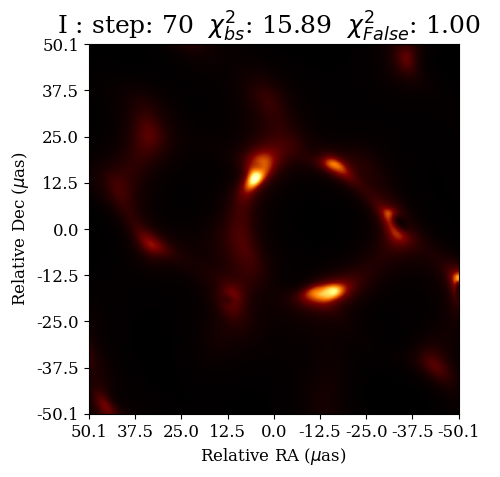

i: 71 chi2_1: 15.43 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.54 s_2: 0.00 s_3: 0.00


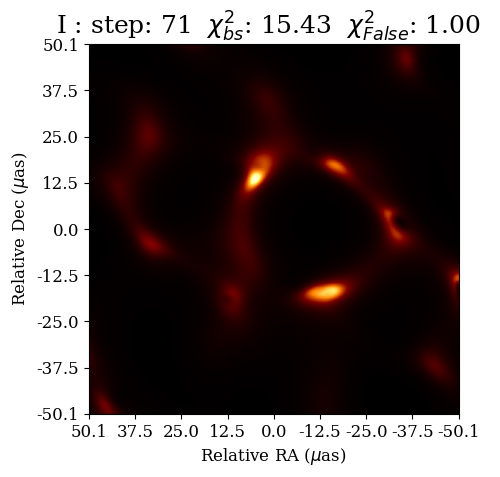

i: 72 chi2_1: 15.10 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.59 s_2: 0.00 s_3: 0.00


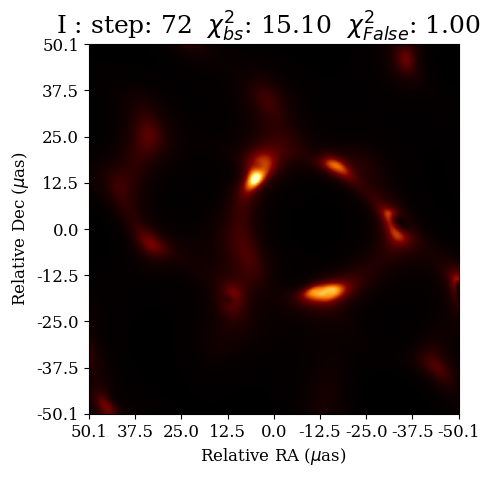

i: 73 chi2_1: 14.75 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.57 s_2: 0.00 s_3: 0.00


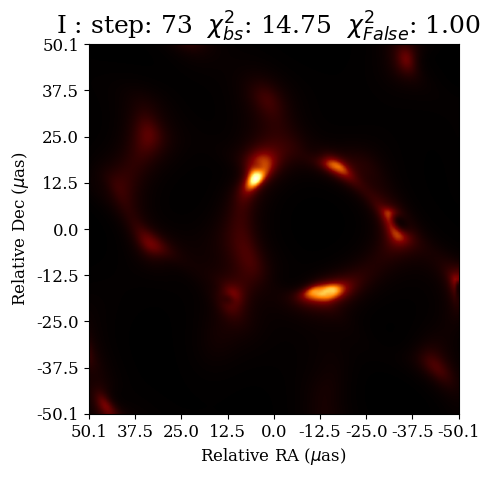

i: 74 chi2_1: 14.54 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.58 s_2: 0.00 s_3: 0.00


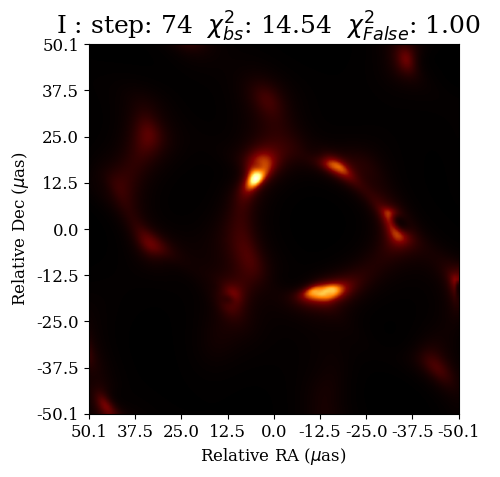

i: 75 chi2_1: 14.42 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.59 s_2: 0.00 s_3: 0.00


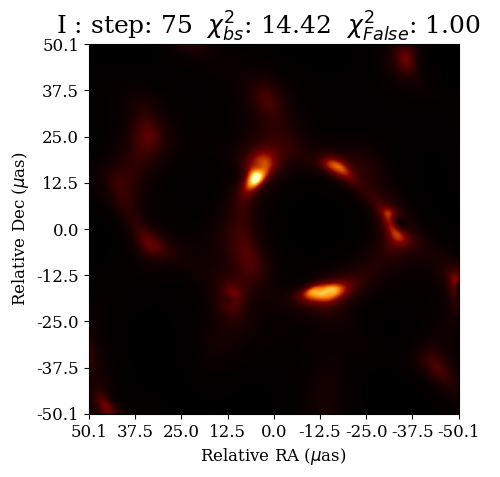

i: 76 chi2_1: 14.35 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.60 s_2: 0.00 s_3: 0.00


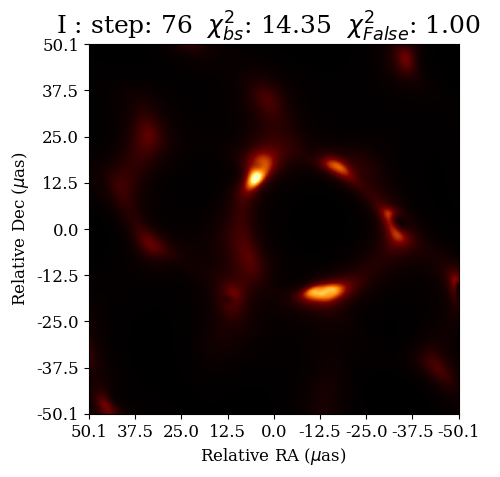

i: 77 chi2_1: 14.24 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.61 s_2: 0.00 s_3: 0.00


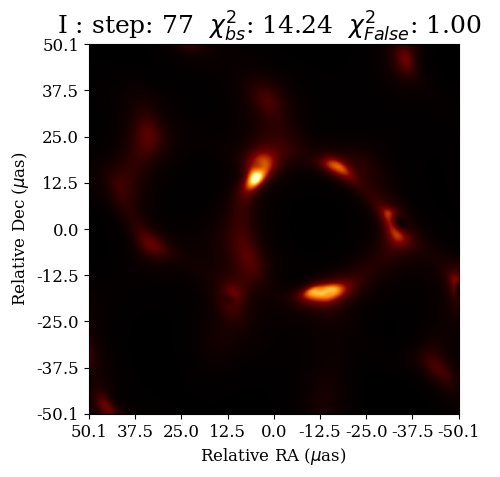

i: 78 chi2_1: 13.91 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.66 s_2: 0.00 s_3: 0.00


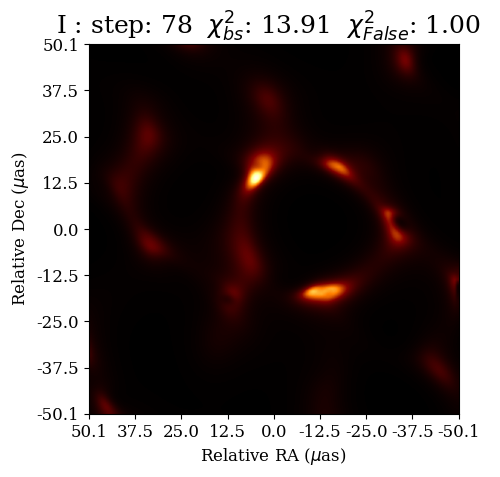

i: 79 chi2_1: 13.75 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.66 s_2: 0.00 s_3: 0.00


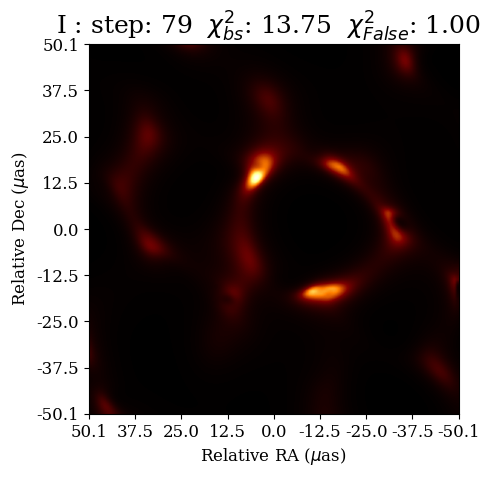

i: 80 chi2_1: 13.64 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.71 s_2: 0.00 s_3: 0.00


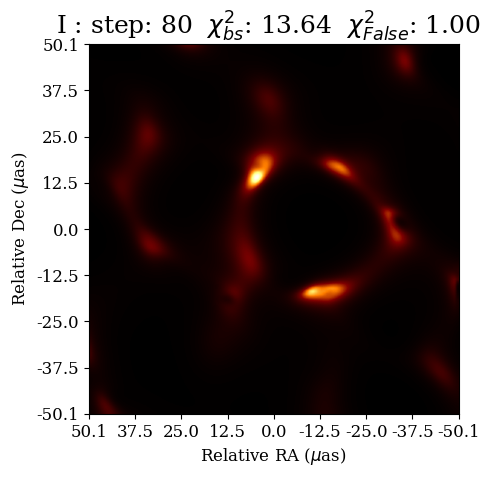

i: 81 chi2_1: 13.52 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.70 s_2: 0.00 s_3: 0.00


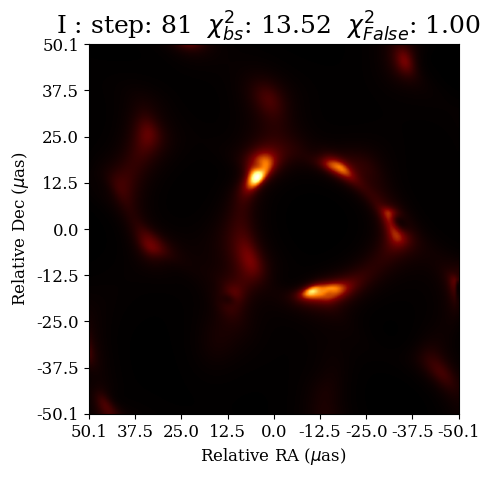

i: 82 chi2_1: 13.46 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.70 s_2: 0.00 s_3: 0.00


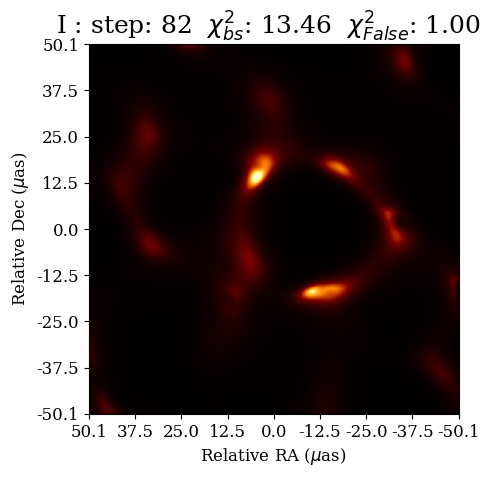

i: 83 chi2_1: 13.28 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.71 s_2: 0.00 s_3: 0.00


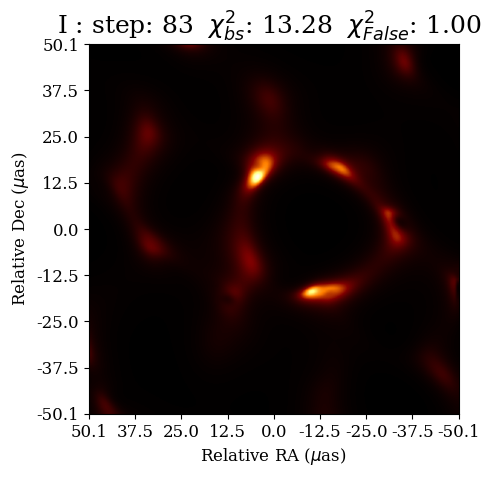

i: 84 chi2_1: 13.00 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.70 s_2: 0.00 s_3: 0.00


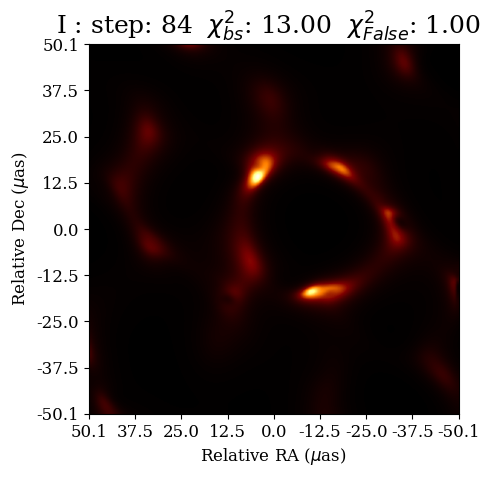

i: 85 chi2_1: 12.72 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.74 s_2: 0.00 s_3: 0.00


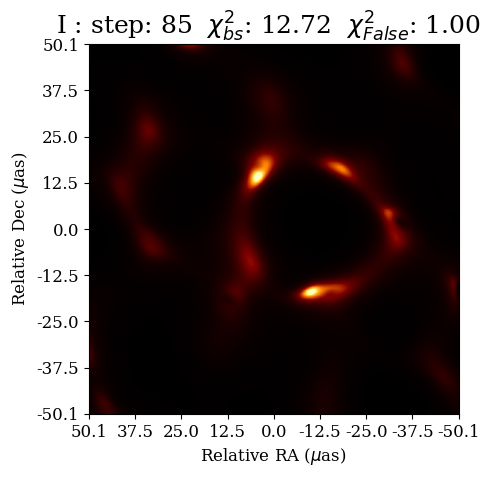

i: 86 chi2_1: 12.50 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.71 s_2: 0.00 s_3: 0.00


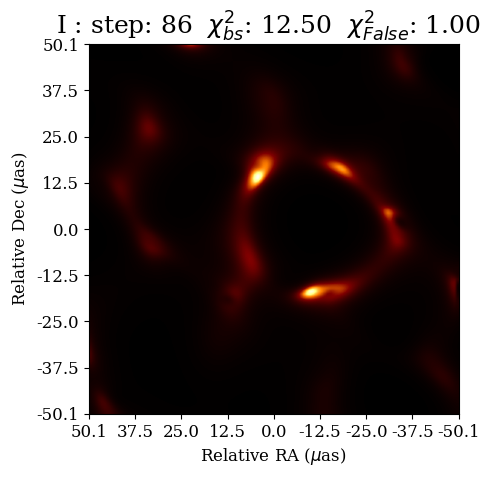

i: 87 chi2_1: 12.23 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.70 s_2: 0.00 s_3: 0.00


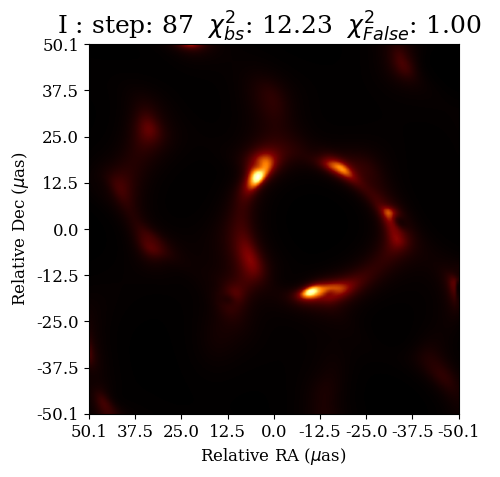

i: 88 chi2_1: 12.14 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.74 s_2: 0.00 s_3: 0.00


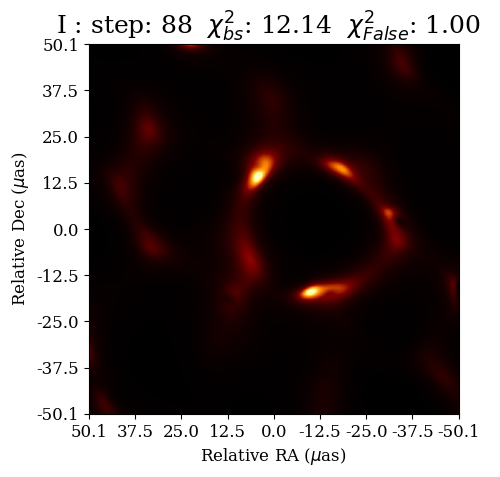

i: 89 chi2_1: 12.04 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.73 s_2: 0.00 s_3: 0.00


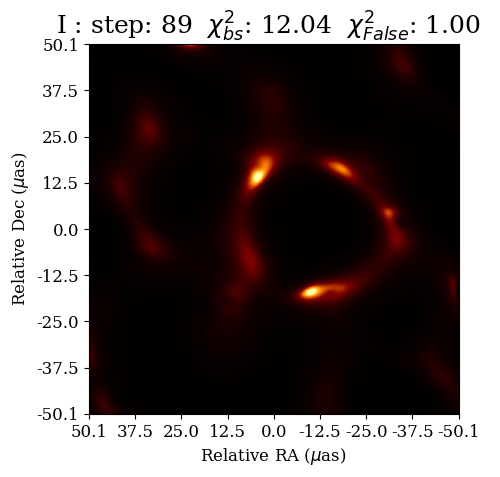

i: 90 chi2_1: 11.87 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.72 s_2: 0.00 s_3: 0.00


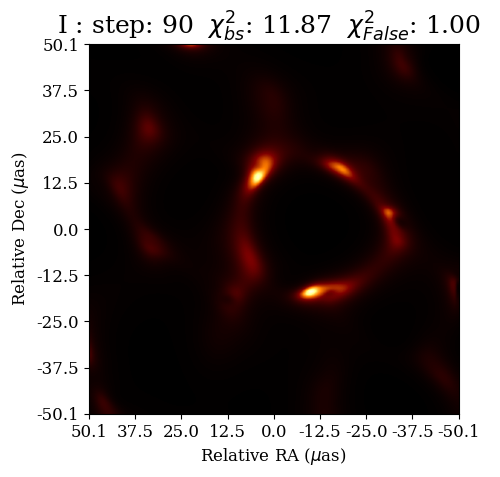

i: 91 chi2_1: 11.64 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.73 s_2: 0.00 s_3: 0.00


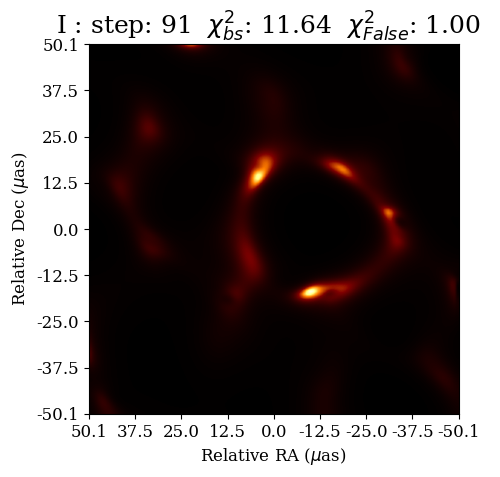

i: 92 chi2_1: 11.38 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.73 s_2: 0.00 s_3: 0.00


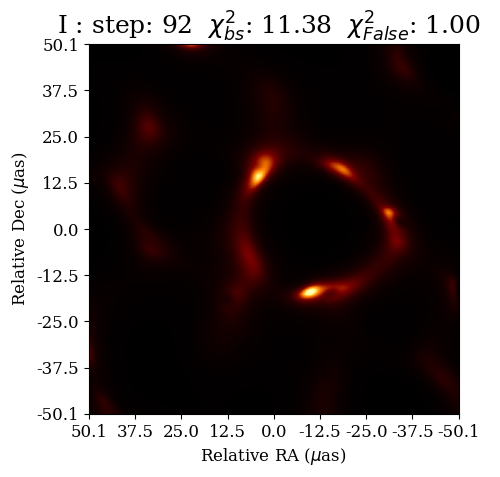

i: 93 chi2_1: 11.00 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.77 s_2: 0.00 s_3: 0.00


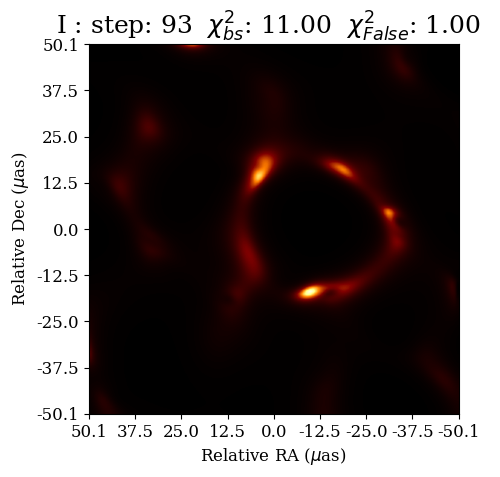

i: 94 chi2_1: 10.56 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.77 s_2: 0.00 s_3: 0.00


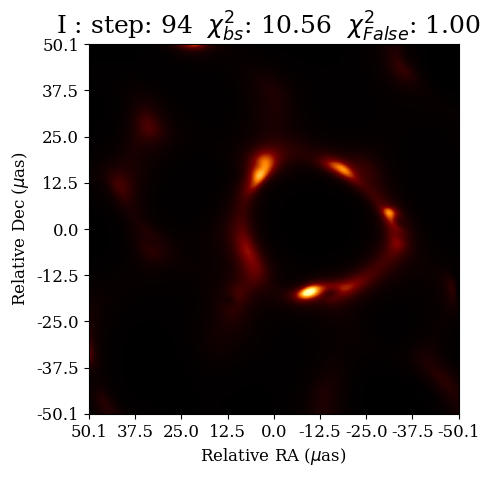

i: 95 chi2_1: 10.37 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.78 s_2: 0.00 s_3: 0.00


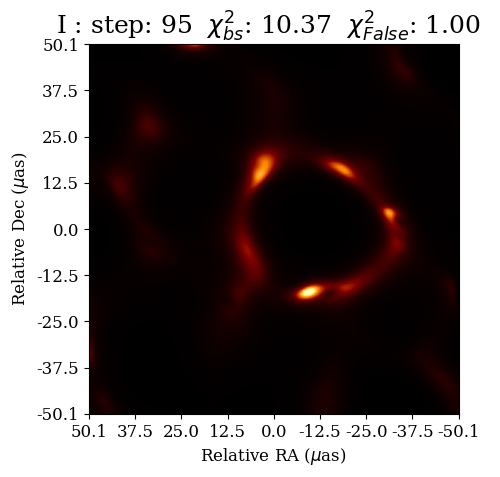

i: 96 chi2_1: 10.11 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.74 s_2: 0.00 s_3: 0.00


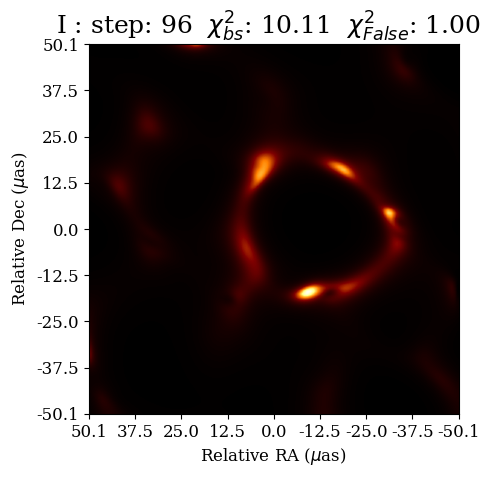

i: 97 chi2_1: 9.85 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.77 s_2: 0.00 s_3: 0.00


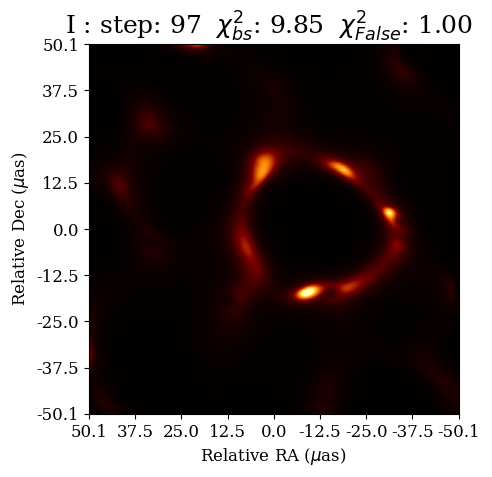

i: 98 chi2_1: 9.66 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.74 s_2: 0.00 s_3: 0.00


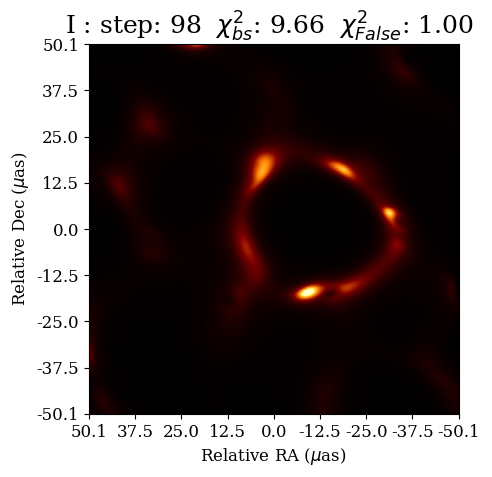

i: 99 chi2_1: 9.50 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.75 s_2: 0.00 s_3: 0.00


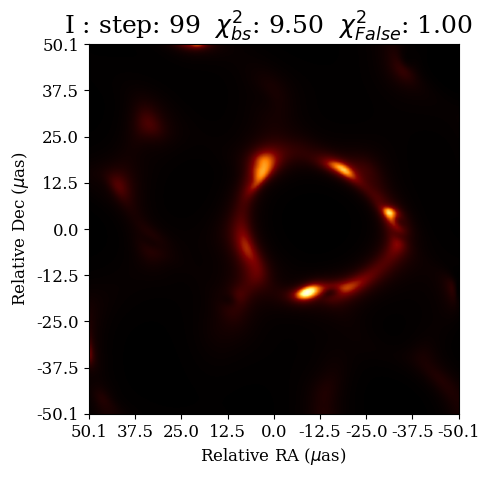

i: 100 chi2_1: 9.33 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.78 s_2: 0.00 s_3: 0.00
time: 82.222842 s
J: 866.227183
Final Chi^2_1: 9.327443 Chi^2_2: 1.000000  Chi^2_3: 1.000000
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT


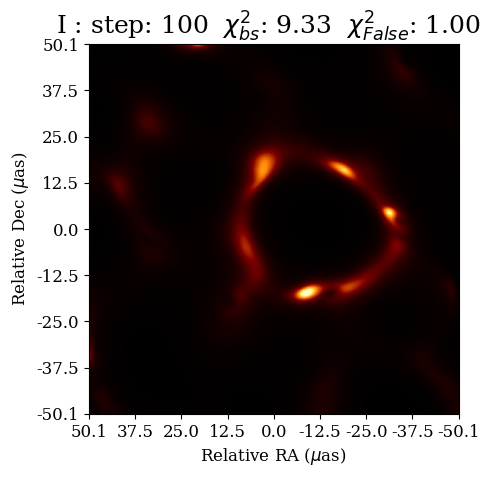

In [6]:
npix = 32
fov = 1.2*im.xdim * im.psize # slightly enlarge the field of view
#dim = obs.dirtyimage(npix, fov)
#dbeam = obs.dirtybeam(npix, fov)
#cbeam = obs.cleanbeam(npix,fov)
#dim.display()
#dbeam.display()
#cbeam.display()

# Resolution
beamparams = obs.fit_beam() # fitted beam parameters (fwhm_maj, fwhm_min, theta) in radians
res = obs.res() # nominal array resolution, 1/longest baseline
print("Clean beam parameters: " , beamparams)
print("Nominal Resolution: " ,res)

# Export the visibility data to uvfits/text
#obs.save_txt('obs.txt') # exports a text file with the visibilities
#obs.save_uvfits('obs.uvp') # exports a UVFITS file modeled on template.UVP

# Generate an image prior
npix = 128
fov = 1*im.fovx()
zbl = im.total_flux() # total flux
prior_fwhm = 200*eh.RADPERUAS # Gaussian size in microarcssec
emptyprior = eh.image.make_square(obs, npix, fov)
flatprior = emptyprior.add_flat(zbl)
gaussprior = emptyprior.add_gauss(zbl, (prior_fwhm, prior_fwhm, 0, 0, 0))

# Image total flux with bispectrum
flux = zbl
tt = time.time()
out  = eh.imager_func(obs, gaussprior, gaussprior, flux,
                      d1='bs', s1='simple',
                      alpha_s1=1, alpha_d1=100,
                      alpha_flux=100, alpha_cm=50,
                      maxit=100, ttype=ttype, show_updates=True)

In [7]:
# Blur the image with a circular beam and image again to help convergance
out = out.blur_circ(res)
out = eh.imager_func(obs, out, out, flux,
                d1='bs', s1='tv',
                alpha_s1=1, alpha_d1=50,
                alpha_flux=100, alpha_cm=50,
                maxit=100,ttype=ttype, show_updates=False)

out = out.blur_circ(res/2.0)
out = eh.imager_func(obs, out, out, flux,
                d1='bs', s1='tv',
                alpha_s1=1, alpha_d1=10,
                alpha_flux=100, alpha_cm=50,
                maxit=100,ttype=ttype, show_updates=False)

print ("total time: ", time.time() - tt)

Generating I image...
Initial S_1: 0.057268 S_2: 0.000000 S_3: 0.000000
Initial Chi^2_1: 225.780495 Chi^2_2: 1.000000 Chi^2_3: 1.000000
Initial Objective Function: 11270.784800
Total Data 1:  645
Total Pixel #:  16384
Clipped Pixel #:  16384

time: 18.795015 s
J: 34.662986
Final Chi^2_1: 1.644108 Chi^2_2: 1.000000  Chi^2_3: 1.000000
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Generating I image...
Initial S_1: 0.113356 S_2: 0.000000 S_3: 0.000000
Initial Chi^2_1: 85.312986 Chi^2_2: 1.000000 Chi^2_3: 1.000000
Initial Objective Function: 845.352281
Total Data 1:  645
Total Pixel #:  16384
Clipped Pixel #:  16384

time: 19.689220 s
J: 2.638364
Final Chi^2_1: 1.134475 Chi^2_2: 1.000000  Chi^2_3: 1.000000
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
total time:  188.68043208122253


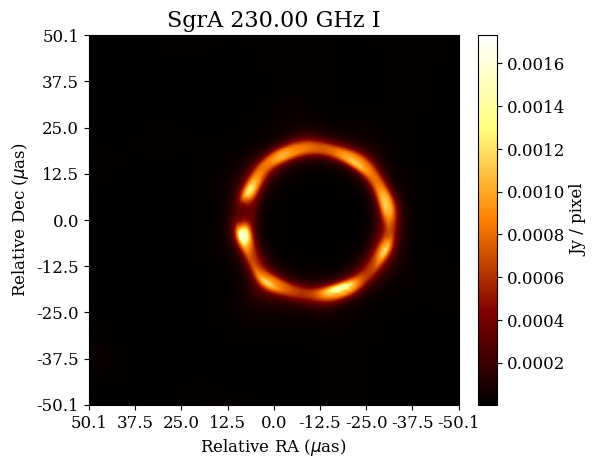

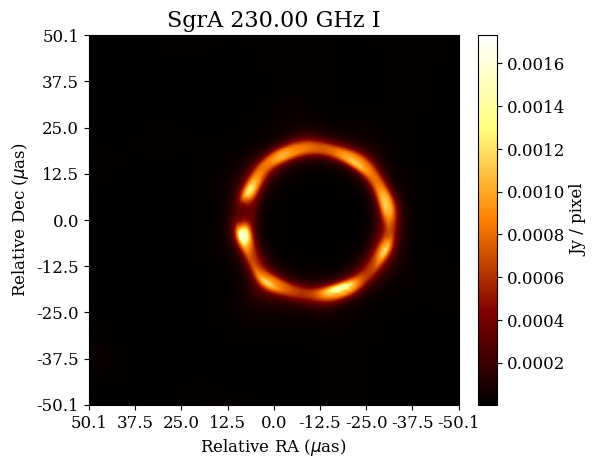

In [8]:
outblur = out.blur_gauss(beamparams, 0.5)
out.display()